In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and concatenate dataframes
csv_files = [
    'Sales_April_2019.csv',
    'Sales_August_2019.csv',
    'Sales_December_2019.csv',
    'Sales_February_2019.csv',
    'Sales_January_2019.csv',
    'Sales_April_2019.csv',
    'Sales_April_2019.csv',
    'Sales_April_2019.csv',
    'Sales_April_2019.csv',
    'Sales_April_2019.csv',
    'Sales_April_2019.csv',
    'Sales_April_2019.csv'
]

In [3]:
df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

df = pd.concat(df_list, ignore_index=True)
print(df.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


In [4]:
# Convert 'Order ID' and 'Price Each' to numeric, and 'Order Date' to datetime
df['Order ID'] = pd.to_numeric(df['Order ID'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.info()

C:\Users\anuz\AppData\Local\Temp\ipykernel_10376\516120062.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205951 entries, 0 to 205950
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          204925 non-null  float64       
 1   Product           205313 non-null  object        
 2   Quantity Ordered  205313 non-null  object        
 3   Price Each        204925 non-null  float64       
 4   Order Date        204925 non-null  datetime64[ns]
 5   Purchase Address  205313 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 9.4+ MB


In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaT,NaN
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
df.shape

(205951, 6)

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Order ID            1026
Product              638
Quantity Ordered     638
Price Each          1026
Order Date          1026
Purchase Address     638
dtype: int64


In [8]:
# Handling any NaT values if needed, for example by dropping rows with NaT in 'Order Date'
df = df.dropna(subset=['Order Date'])

missing_values = df.isnull().sum()
print(missing_values)

df.head()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [9]:
# Drop rows with NaN values in critical columns
#df = df.dropna(subset=['Order ID', 'Price Each', 'Order Date'])
#df.head()

In [10]:
df.shape

(204925, 6)

In [11]:
# Clean 'Quantity Ordered' column by removing non-numeric values
df = df[pd.to_numeric(df['Quantity Ordered'], errors='coerce').notnull()]
df['Quantity Ordered'] = df['Quantity Ordered'].astype(float)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [12]:
# Calculate Sales
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [13]:
# Extract date components
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

In [14]:
# Group by month and calculate total sales
monthly_sales = df.groupby('Month')['Sales'].sum()
print(monthly_sales)

Month
1      1822256.73
2      2202022.42
3         3207.50
4     27083998.56
5        84474.32
8      2242315.57
9         2096.74
12     4610626.83
Name: Sales, dtype: float64


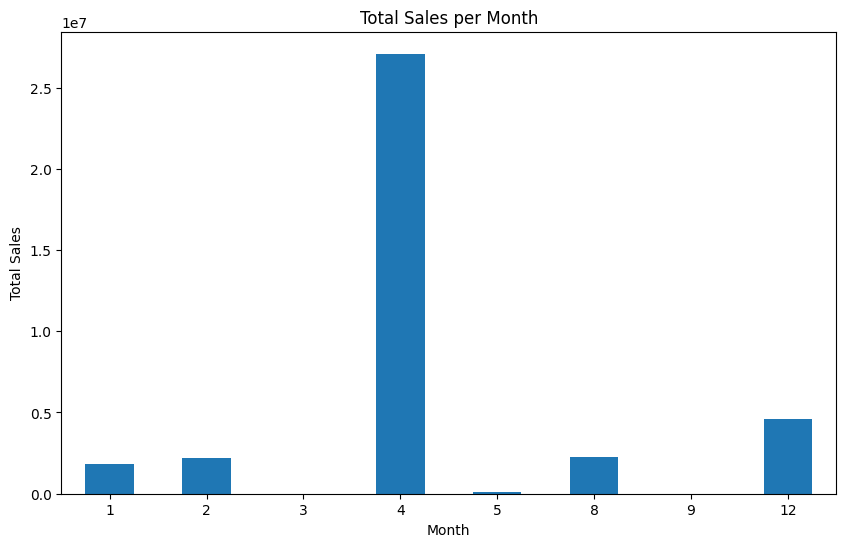

In [15]:
# Plotting the sales trend per month
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')
plt.xticks(rotation=0)  # Ensure month labels are horizontal
plt.show()

In [16]:
# Check if the data types are correctly set
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204925 entries, 0 to 205950
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          204925 non-null  float64       
 1   Product           204925 non-null  object        
 2   Quantity Ordered  204925 non-null  float64       
 3   Price Each        204925 non-null  float64       
 4   Order Date        204925 non-null  datetime64[ns]
 5   Purchase Address  204925 non-null  object        
 6   Sales             204925 non-null  float64       
 7   Month             204925 non-null  int32         
 8   Day               204925 non-null  int32         
 9   Hour              204925 non-null  int32         
 10  Minute            204925 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(4), object(2)
memory usage: 15.6+ MB


Day
1     1311460.09
2     1202826.86
3     1247513.01
4     1299362.46
5     1266296.40
6     1253790.16
7     1173664.10
8     1118153.91
9     1266833.84
10    1354576.64
11    1282135.92
12    1214176.81
13    1225909.16
14    1193513.05
15    1239460.53
16    1335735.38
17    1380574.40
18    1379510.43
19    1152245.90
20    1152475.15
21    1314966.33
22    1100131.34
23    1230588.45
24    1439543.66
25    1357289.87
26    1292937.94
27    1326327.13
28    1196975.46
29    1267901.30
30    1214711.74
31     259411.25
Name: Sales, dtype: float64


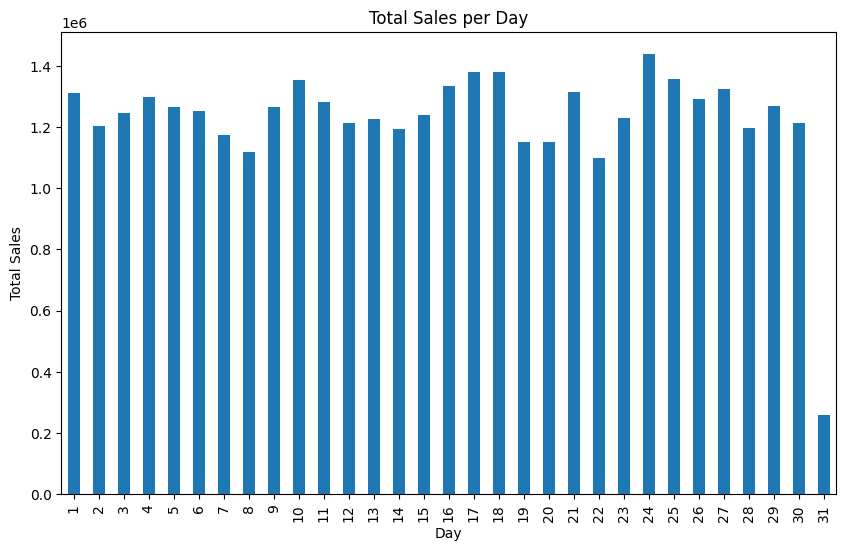

In [17]:
# Group by day and calculate total sales
daily_sales = df.groupby('Day')['Sales'].sum()
print(daily_sales)

# Plotting the sales trend per day
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.title('Total Sales per Day')
plt.show()

Hour
0      812721.87
1      527333.95
2      256335.70
3      205129.31
4      194178.02
5      237518.57
6      475401.33
7      801434.27
8     1316288.34
9     1978498.69
10    2257039.27
11    2484735.43
12    2619647.59
13    2272476.09
14    2332124.63
15    2123970.30
16    2114966.31
17    2168758.91
18    2473437.21
19    2730225.28
20    2475593.86
21    2161214.77
22    1781474.85
23    1250494.12
Name: Sales, dtype: float64


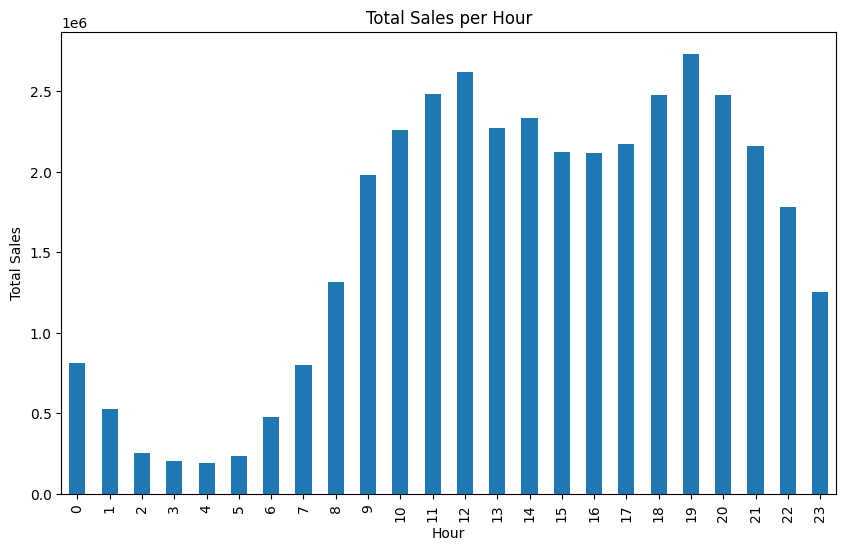

In [18]:
# Group by hour and calculate total sales
hourly_sales = df.groupby('Hour')['Sales'].sum()
print(hourly_sales)

# Plotting the sales trend per hour
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.title('Total Sales per Hour')
plt.show()


Product
20in Monitor                   489895.46
27in 4K Gaming Monitor        2558334.40
27in FHD Monitor              1236967.53
34in Ultrawide Monitor        2730608.14
AA Batteries (4-pack)          120119.04
AAA Batteries (4-pack)          99620.82
Apple Airpods Headphones      2567400.00
Bose SoundSport Headphones    1451054.88
Flatscreen TV                 1567500.00
Google Phone                  3853800.00
LG Dryer                       495000.00
LG Washing Machine             418800.00
Lightning Charging Cable       390882.70
Macbook Pro Laptop            8658100.00
ThinkPad Laptop               4445955.54
USB-C Charging Cable           308441.45
Vareebadd Phone                976800.00
Wired Headphones               274918.71
iPhone                        5406800.00
Name: Sales, dtype: float64


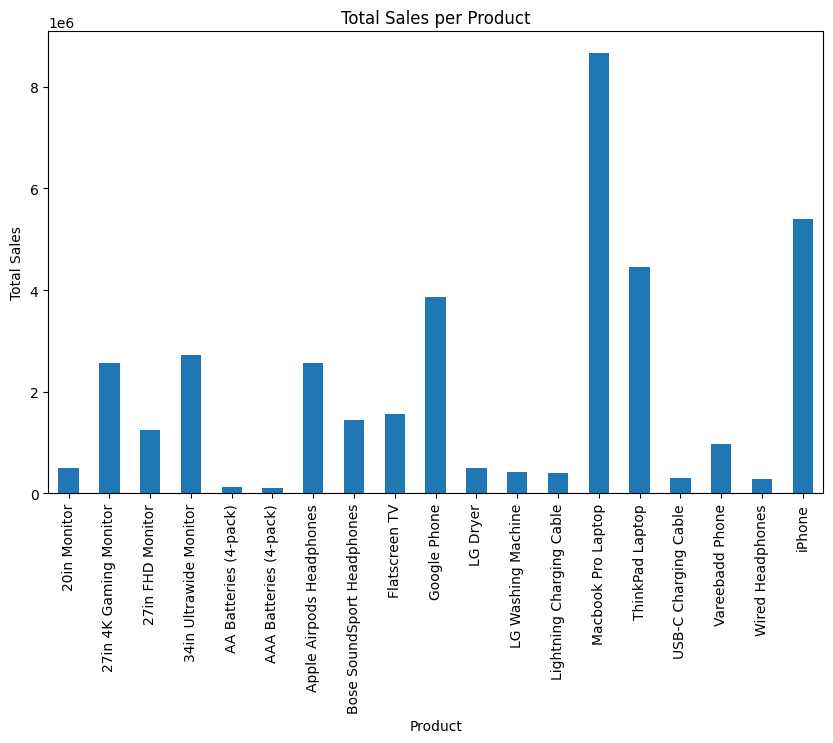

In [19]:
# Group by product and calculate total sales
product_sales = df.groupby('Product')['Sales'].sum()
print(product_sales)

# Plotting the sales trend per product
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product')
plt.show()


Product
Macbook Pro Laptop            8658100.00
iPhone                        5406800.00
ThinkPad Laptop               4445955.54
Google Phone                  3853800.00
34in Ultrawide Monitor        2730608.14
Apple Airpods Headphones      2567400.00
27in 4K Gaming Monitor        2558334.40
Flatscreen TV                 1567500.00
Bose SoundSport Headphones    1451054.88
27in FHD Monitor              1236967.53
Name: Sales, dtype: float64


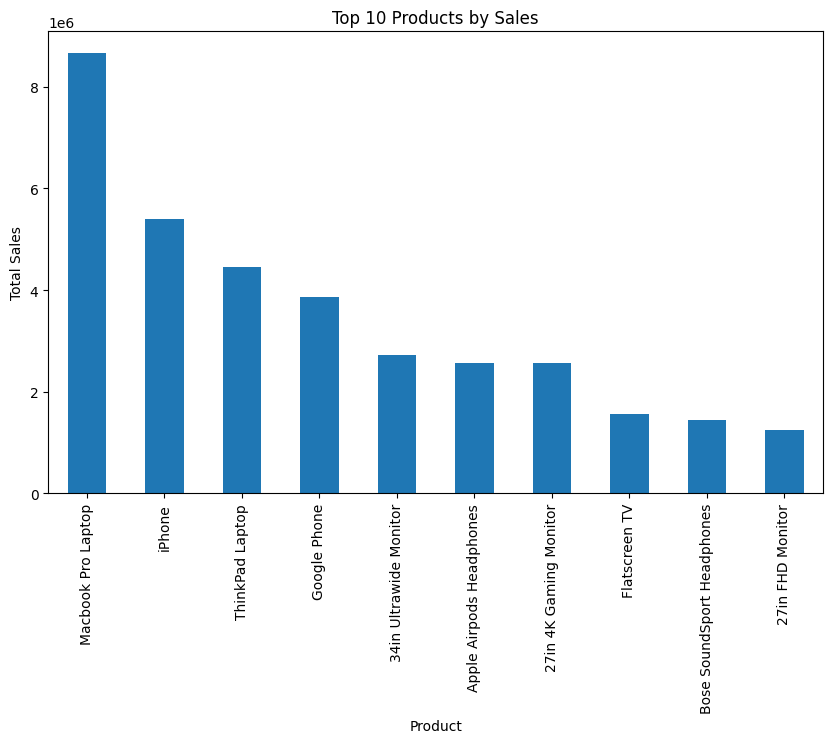

In [20]:
# Group by product and calculate total sales
top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Plotting the top 10 products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top 10 Products by Sales')
plt.show()
